<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# Map of Science 

## GBI6-2021II: BIOINFORMÁTICA

**Caiza Ortiz Ricardo Xavier**

**17-02-2022**

In [1]:
# importo las librerías
import re
import csv
import itertools

In [33]:
# realizo el minado de autores
f = open('pubmed-Phoneutria.txt',errors = 'ignore')
Data = f.read()

In [34]:
len(Data)

806588

Note that the zipcode could be broken over two lines, as in line 43 of `pubmed_results.txt`

```
AD  - Biological and Biomedical Sciences Program, Harvard Medical School, Boston, MA
      02115, USA. Department of Genetics, Harvard Medical School, Boston, MA 02115,
      USA.
```

To avoid problems, replace each newline followed by 6 spaces with a single space.

In [36]:
 # replace each newline followed by 6 spaces with a single space.
data = re.sub(r"\n\s{6}", " " , Data)

We should now have every entry in a single line. Let's look at part of an entry:

In [37]:
print(Data[:2000])

PMID- 30003916
OWN - NLM
STAT- MEDLINE
DCOM- 20181211
LR  - 20181211
IS  - 1879-3150 (Electronic)
IS  - 0041-0101 (Linking)
VI  - 151
DP  - 2018 Sep 1
TI  - Phoneutria nigriventer venom: A pharmacological treasure.
PG  - 96-110
LID - S0041-0101(18)30304-0 [pii]
LID - 10.1016/j.toxicon.2018.07.008 [doi]
AB  - In millions of years, spiders have optimized their venoms in order to assure 
      successful prey capture and defence against predators. Spider venoms have become 
      unique cocktails of biological active components enabling potentially interesting 
      application for drug discovery or for agricultural purposes. The venom of Phoneutria 
      nigriventer has been studied for over 60 years. This spider is responsible for a 
      high number of envenomations with severe clinical manifestations in humans, which 
      necessitates a comprehensive knowledge of its venom composition. With over 40 
      different neurotoxic peptides characterized so far and still many more awai

Now write a regular expression that creates a list of zipcodes:

In [38]:
# Extraemos los países 
My_Data = re.findall(r"\,\s[A-Z]+[A-z]{2,30}\.", data)
unique_codes = list(set(My_Data))
unique_codes.sort()

In [39]:
a = unique_codes
print(a)

[', Argentina.', ', Australia.', ', BACHD.', ', Belgium.', ', Brasil.', ', Brazil.', ', Canada.', ', China.', ', Colombia.', ', France.', ', Germany.', ', Inc.', ', Iran.', ', Italy.', ', Japan.', ', Korea.', ', Lab.', ', London.', ', Romania.', ', Sweden.', ', UNICAMP.', ', USA.']


In [40]:
# remueve cualquier elemento que no sea considerado un país
r = unique_codes
r.remove(', BACHD.')
r.remove(', Inc.')
r.remove( ', UNICAMP.')

In [15]:
print(r)

[', Argentina.', ', Australia.', ', Belgium.', ', Brasil.', ', Brazil.', ', Canada.', ', China.', ', Colombia.', ', France.', ', Germany.', ', Iran.', ', Italy.', ', Japan.', ', Korea.', ', Lab.', ', London.', ', Romania.', ', Sweden.', ', USA.']


In [41]:
a = "".join(unique_codes)
b = a.split(", ")
c = "".join(b)
unique_zipcodes = c.split(".")

In [17]:
print(unique_codes[:20])

[', Argentina.', ', Australia.', ', Belgium.', ', Brasil.', ', Brazil.', ', Canada.', ', China.', ', Colombia.', ', France.', ', Germany.', ', Iran.', ', Italy.', ', Japan.', ', Korea.', ', Lab.', ', London.', ', Romania.', ', Sweden.', ', USA.']


In [18]:
len(unique_codes)

19

In [26]:
# importo la librería para trabajar con tablas de datos
import pandas as pd
%matplotlib inline

Coordenadas = pd.read_csv('countries_location.csv', engine='python', skipfooter=3)
Coordenadas.head(19)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [27]:
# llamamos a los datos para la grafica:
Coordenadas.columns = ["ID_País", "Latitud", "Longitud", "Nombre"]
Coordenadas.head(19)

,ID_País,Latitud,Longitud,Nombre
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [28]:
datos_nombre = Coordenadas[Coordenadas.Nombre.isin(unique_zipcodes)]
datos_paises = Coordenadas[Coordenadas.ID_País.isin(unique_zipcodes)]
all_data =pd.concat([datos_nombre,datos_paises]).drop_duplicates().sort_values('Nombre')

In [30]:
all_data.head(10)

,ID_País,Latitud,Longitud,Nombre
10,AR,-38.416097,-63.616672,Argentina
13,AU,-25.274398,133.775136,Australia
19,BE,50.503887,4.469936,Belgium
28,BR,-14.235004,-51.925280,Brazil
35,CA,56.130366,-106.346771,Canada
45,CN,35.861660,104.195397,China
46,CO,4.570868,-74.297333,Colombia
71,FR,46.227638,2.213749,France
53,DE,51.165691,10.451526,Germany
105,IR,32.427908,53.688046,Iran


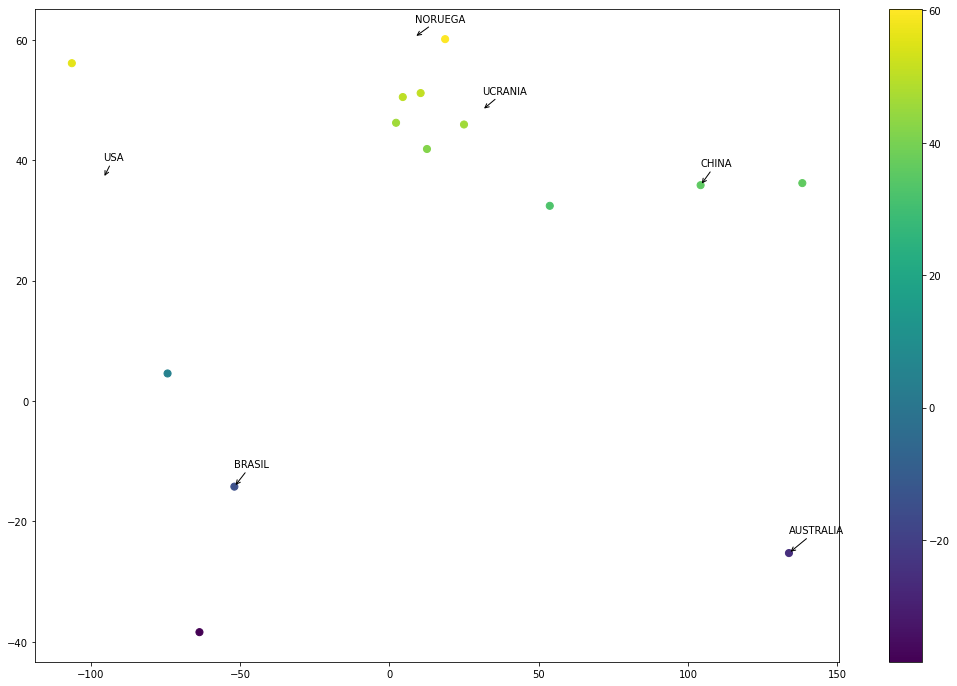

In [42]:
import matplotlib.pyplot as plt
plt.scatter(all_data.Longitud, all_data.Latitud, s=50, c=all_data.Latitud)
plt.colorbar()

ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('UCRANIA', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRASIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('NORUEGA', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )